In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**The explanatory and exploratory analysis results of the trip data  ******



in this file , we will figure out the main features from the dependence of the trip duration on the age and uer type .

In [2]:
#import required packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


In [4]:
#loading the dataset file 
df = pd.read_csv('C:/Users/Esraa/Downloads/201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


**Distribution of the trip duration******

Generally,the dataset based on 16 parameter such as;trip duration, member gender, user type ....etc in the follwing section the dis. od the trip duration

<ipython-input-5-a7bd0d728b2e>:11: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.axis([0,10000,0,15000])


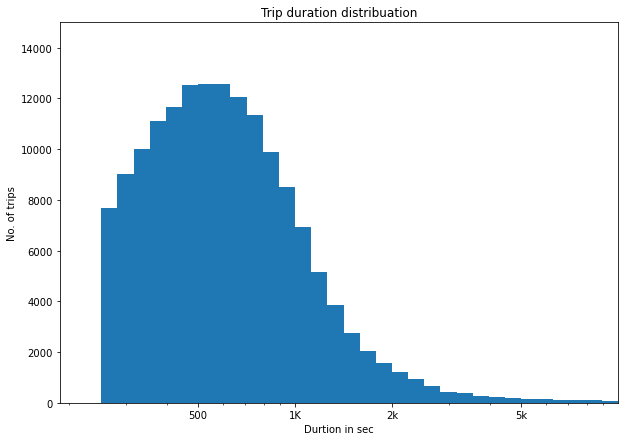

In [5]:
#insight the above distribuation in log scale to find the features easily
log_binsize = 0.05
bins_log = 10** np.arange(2.4,np.log10(df['duration_sec'].max())+log_binsize,log_binsize)

plt.figure(figsize=[10,7])
plt.hist(data = df,x = 'duration_sec',bins=bins_log)
plt.xlabel('Durtion in sec')
plt.xscale('log')
plt.ylabel('No. of trips')
plt.title('Trip duration distribuation')
plt.axis([0,10000,0,15000])
plt.xticks([500,1e3,2e3,5e3],[500,'1K','2k','5k'])
plt.show()

**The corrlation between Trip duration and Age **

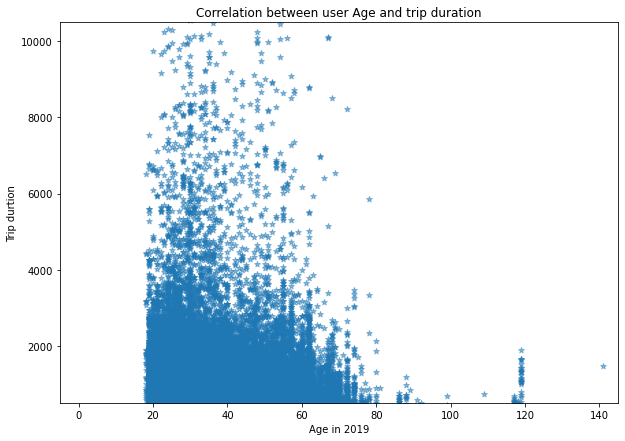

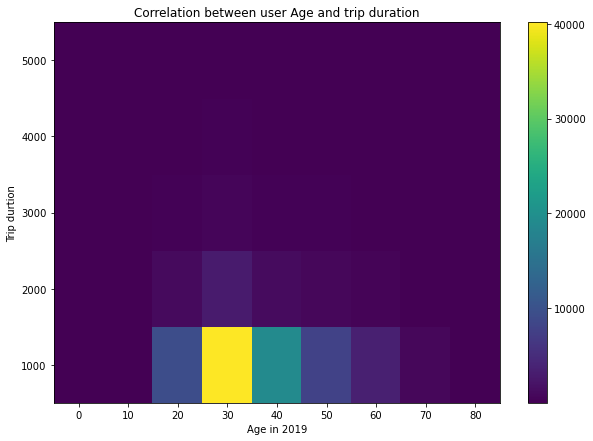

In [6]:
#study the corrlation between the age and the trip duration
plt.figure(figsize=[10,7])
plt.scatter((2019-df['member_birth_year']),df['duration_sec'],alpha=0.5, marker='*')
plt.title('Correlation between user Age and trip duration')
plt.xlabel('Age in 2019')
plt.ylabel('Trip durtion')
plt.axis([-5,145,500,10500])

plt.figure(figsize=[10,7])
bins_y=np.arange(500,6500,1000)
bins_x=np.arange(-5,86,10)
plt.hist2d((2019-df['member_birth_year']),df['duration_sec'],bins = [bins_x,bins_y])
plt.title('Correlation between user Age and trip duration')
plt.xlabel('Age in 2019')
plt.ylabel('Trip durtion')
plt.colorbar(ticks=[10000,20000,30000,40000]);
plt.show()

**The user age distribuation effect**

from such distribution,we can say that the trip duration of the small ages less than 40 has long trip duration

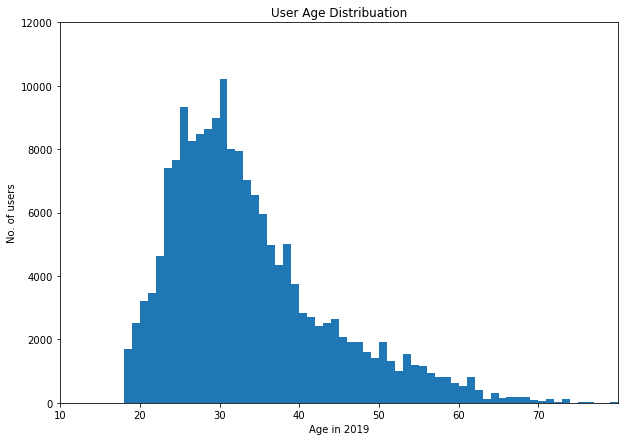

In [7]:

#study the distribuation of another variable related to the age of the members
binsize = 1
bins = np.arange(0,df['member_birth_year'].astype(float).max()+binsize,binsize)

plt.figure(figsize=[10,7])
plt.hist(data = df.dropna(),x = 'member_birth_year',bins=bins)
plt.title('User Age Distribuation')
plt.xlabel('Age in 2019')
plt.ylabel('No. of users')
plt.axis([1939,2009,0,12000])
#calulate the user age fom their birth year till 2019
plt.xticks([1949,1959,1969,1979,1989,1999,2009],[(70),(60),(50),(40),(30),(20),(10)])
plt.gca().invert_xaxis()
plt.show()



**the trip duration dependence on the age and gender**

The effect of three parater on each other and we find that the longer trip duration  has observed for user has ages around 50.

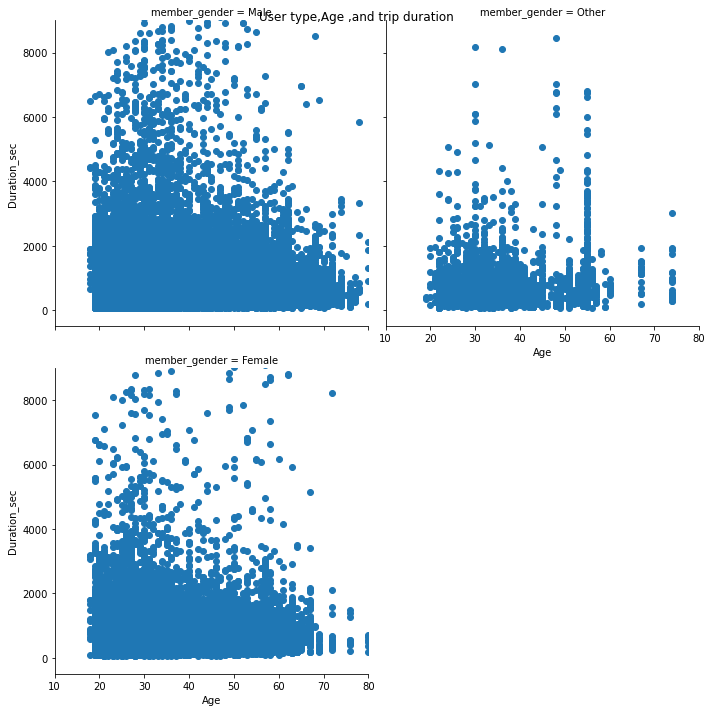

In [8]:
df['age']=(2019-df['member_birth_year'])
gender = sb.FacetGrid(data = df,col = 'member_gender',col_wrap = 2,height = 5,
                                                                  xlim = [10,80],ylim= [-500,9000])
gender.map(plt.scatter,'age','duration_sec',alpha=1)
gender.fig.suptitle('User type,Age ,and trip duration')
gender.set_xlabels('Age')
gender.set_ylabels('Duration_sec')
plt.show()

**the trip duration dependence on the age and user type**

The effect of three parater on each other and we find that the effect of user types by its two categories has same gender effect  ,also the subscriber type has longer trip duration for user has ages around 50.

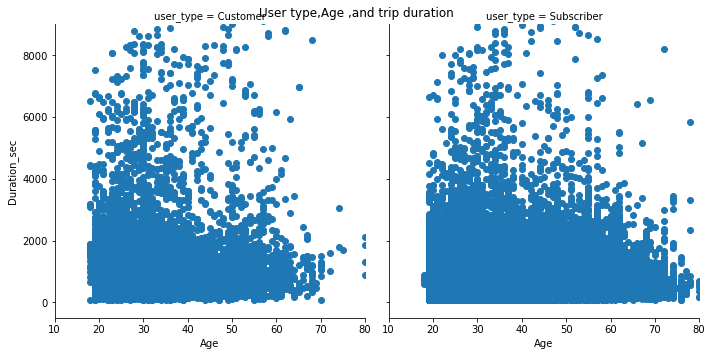

In [9]:
#in this section , we will seprate the user type effects on the trip duration due to the age 

df['age']=(2019-df['member_birth_year'])
user_type = sb.FacetGrid(data = df,col = 'user_type',col_wrap = 2,height = 5,
                                                                  xlim = [10,80],ylim= [-500,9000])
user_type.map(plt.scatter,'age','duration_sec',alpha=1)
user_type.fig.suptitle('User type,Age ,and trip duration')
user_type.set_xlabels('Age')
user_type.set_ylabels('Duration_sec')
plt.show()

In [10]:
#jave script  source: https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer 
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
       $('div.input').hide();
 } else {
      $('div.input').show();
 }
 code_show = !code_show
} 
     $( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [11]:
jupyter nbconvert slide_deck_Explanatory.ipynb --to slides --post serve --template output_toggle

SyntaxError: invalid syntax (<ipython-input-11-5c27532f7e1d>, line 1)